Load the Iris dataset; The original data has 4 columns (sepal length, sepal width, petal length, and petal width)

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(df)

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


PCA is affected by scale so normalization should be applied before performing the dimensionality reduction. We can use  StandardScaler from the Scikit Learn library, which helps to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [3]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

Performing the PCA with 2 components

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
              , columns = ['PC 1', 'PC 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

         PC 1      PC 2          target
0   -2.264542  0.505704     Iris-setosa
1   -2.086426 -0.655405     Iris-setosa
2   -2.367950 -0.318477     Iris-setosa
3   -2.304197 -0.575368     Iris-setosa
4   -2.388777  0.674767     Iris-setosa
..        ...       ...             ...
145  1.870522  0.382822  Iris-virginica
146  1.558492 -0.905314  Iris-virginica
147  1.520845  0.266795  Iris-virginica
148  1.376391  1.016362  Iris-virginica
149  0.959299 -0.022284  Iris-virginica

[150 rows x 3 columns]


Visualization of the obersavations in the PCA space

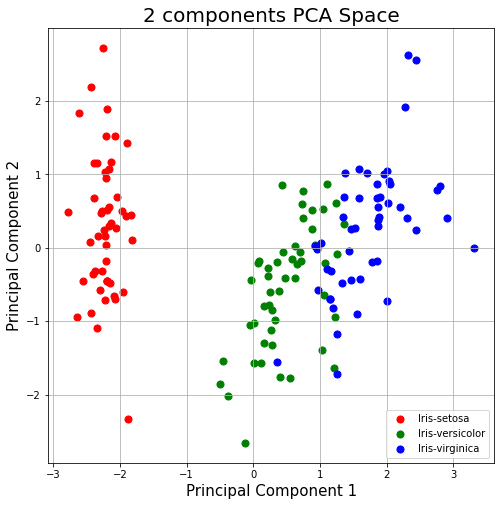

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA Space', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


3D PCA projection

In [8]:
pca3d = PCA(n_components=3)
principalComponents_3d = pca3d.fit_transform(x)
principalDf_3d = pd.DataFrame(data = principalComponents_3d
              , columns = ['PC 1', 'PC 2', 'PC 3'])
finalDf_3d = pd.concat([principalDf_3d, df[['target']]], axis = 1)
print(finalDf_3d)

         PC 1      PC 2      PC 3          target
0   -2.264542  0.505704 -0.121943     Iris-setosa
1   -2.086426 -0.655405 -0.227251     Iris-setosa
2   -2.367950 -0.318477  0.051480     Iris-setosa
3   -2.304197 -0.575368  0.098860     Iris-setosa
4   -2.388777  0.674767  0.021428     Iris-setosa
..        ...       ...       ...             ...
145  1.870522  0.382822  0.254532  Iris-virginica
146  1.558492 -0.905314 -0.025382  Iris-virginica
147  1.520845  0.266795  0.179277  Iris-virginica
148  1.376391  1.016362  0.931405  Iris-virginica
149  0.959299 -0.022284  0.528794  Iris-virginica

[150 rows x 4 columns]


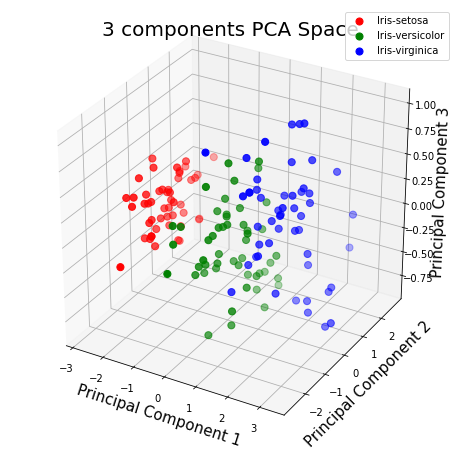

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = "3d") 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 components PCA Space', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_3d['target'] == target
    ax.scatter(finalDf_3d.loc[indicesToKeep, 'PC 1']
               , finalDf_3d.loc[indicesToKeep, 'PC 2']
               , finalDf_3d.loc[indicesToKeep, 'PC 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Plot the scatter according to the original features

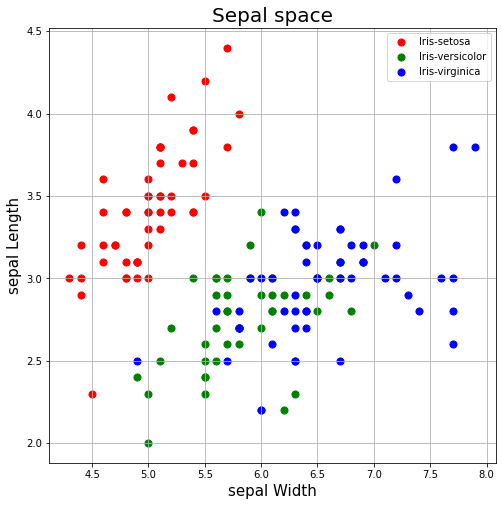

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('sepal Width', fontsize = 15)
ax.set_ylabel('sepal Length', fontsize = 15)
ax.set_title('Sepal space', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(df.loc[indicesToKeep, 'sepal length']
               , df.loc[indicesToKeep, 'sepal width']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


Performing K-means Clustering on the original dataset

In [11]:
from sklearn.cluster import KMeans

#x= principalComponents
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)
print("The Objective value: ", kmeans.inertia_)
print(kmeans.labels_)

The Objective value:  140.96581663074699
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Predicting the K-means cluster on the same *x* feature set

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


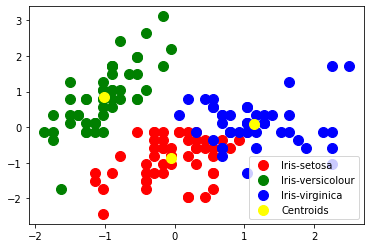

In [12]:
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

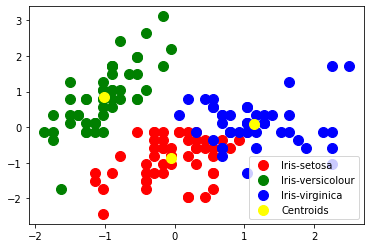

In [13]:
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Elbow method for finding optimal *k*

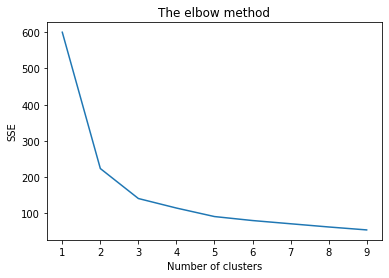

In [14]:
SSE = []
max_k = 10

for i in range(1, max_k):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, max_k), SSE)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') #within cluster sum of squares
plt.show()

Image compression using *k*-means

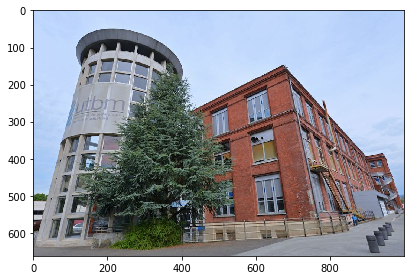

Number of rows: 662 
Number of columns: 999 
Number of channels: 3


In [15]:
#Importing the required libraries.
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Loading the image.
image = io.imread('https://www.tracesecritesnews.fr/wp-content/source/2019/01/utbmbelfort.jpg')
io.imshow(image)
io.show()
#Dimensions of the original image
nrows = image.shape[0]
ncols = image.shape[1]
nchls = image.shape[2]
print("Number of rows:",nrows,"\nNumber of columns:",ncols, "\nNumber of channels:",nchls)

Performing the *k*-means clustering to compress the image

Number of clusters: 2


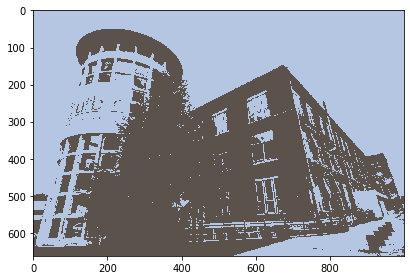

Number of clusters: 4


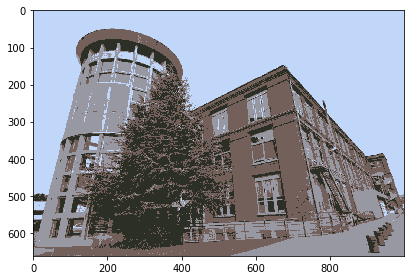

KeyboardInterrupt: ignored

In [16]:
#Flattening the image
image = image.reshape(nrows*ncols, nchls)

for i in range(1,8):
    # The clusters are 2^i (2,4,8,16,32)
    k=pow(2,i)
    compressor = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    compressor.fit(image)
    
    #Replacing each pixel value with its nearest centroid.
    compressed_image = compressor.cluster_centers_[compressor.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
    
    #Reshaping the image back to its original dimension.
    compressed_image = compressed_image.reshape(nrows, ncols, nchls)
    
    #Save and display output image.
    print("Number of clusters:",k)
    io.imshow(compressed_image)
    io.show()

Perceptron example

In [17]:
import torch 
X = torch.tensor([3, 1, -4])
W = torch.tensor([1, -4, 3])
w0 = 2
y = torch.relu(w0 + X.T @ W)
print(y)

tensor(0)


<ipython-input-17-a7447a580d0b>:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  y = torch.relu(w0 + X.T @ W)


In [18]:
torch.manual_seed(0)

# dense layer
class MyDenseLayer(torch.nn.Module):
    def __init__(self, in_d, out_d):
        super(MyDenseLayer, self).__init__()
        self.weight = torch.nn.Parameter(torch.randn(in_d, out_d))
        self.bias = torch.nn.Parameter(torch.randn(out_d))

    def forward(self, x):
        z = x @ self.weight + self.bias
        output = torch.relu(z)
        return output

X = torch.tensor(x, dtype=torch.float)
model = MyDenseLayer(4, 2)
y = model(X)
print(y)

tensor([[0.0000, 1.2232],
        [0.0000, 0.6366],
        [0.0000, 1.0503],
        [0.0000, 0.7953],
        [0.0000, 1.3903],
        [0.0000, 1.6244],
        [0.0000, 1.3796],
        [0.0000, 1.0477],
        [0.0000, 0.6828],
        [0.0000, 0.5784],
        [0.0000, 1.3001],
        [0.0000, 1.0392],
        [0.0000, 0.5620],
        [0.0000, 0.9784],
        [0.0000, 1.7911],
        [0.0000, 2.3345],
        [0.0000, 1.9426],
        [0.0000, 1.3334],
        [0.0000, 1.2761],
        [0.0000, 1.6484],
        [0.0000, 0.7464],
        [0.0000, 1.6271],
        [0.0000, 1.8506],
        [0.0000, 1.0520],
        [0.0000, 0.8006],
        [0.0000, 0.4420],
        [0.0000, 1.1885],
        [0.0000, 1.1081],
        [0.0000, 1.0561],
        [0.0000, 0.8117],
        [0.0000, 0.6446],
        [0.0000, 1.1258],
        [0.0000, 1.7871],
        [0.0000, 2.0017],
        [0.0000, 0.5784],
        [0.0000, 1.0232],
        [0.0000, 1.1605],
        [0.0000, 0.5784],
        [0.0

In [19]:
principalComponents = y.detach().numpy()
principalDf = pd.DataFrame(data = principalComponents
              , columns = ['y 1', 'y 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

          y 1       y 2          target
0    0.000000  1.223184     Iris-setosa
1    0.000000  0.636609     Iris-setosa
2    0.000000  1.050323     Iris-setosa
3    0.000000  0.795276     Iris-setosa
4    0.000000  1.390275     Iris-setosa
..        ...       ...             ...
145  0.847687  0.000000  Iris-virginica
146  2.532930  0.000000  Iris-virginica
147  0.315161  0.000000  Iris-virginica
148  0.000000  0.000000  Iris-virginica
149  0.000000  0.000000  Iris-virginica

[150 rows x 3 columns]


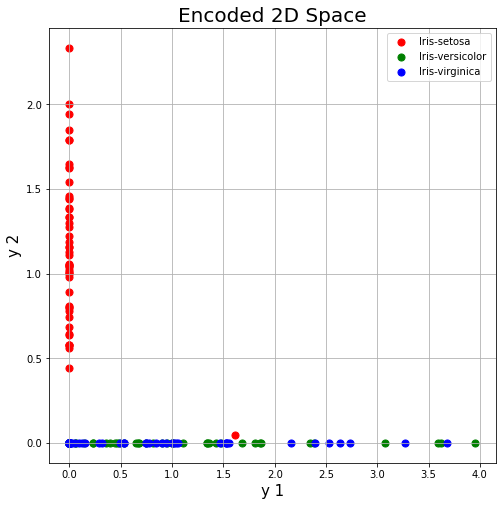

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('y 1', fontsize = 15)
ax.set_ylabel('y 2', fontsize = 15)
ax.set_title('Encoded 2D Space', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'y 1']
               , finalDf.loc[indicesToKeep, 'y 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()